In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from reproduce_plots import collate_variants

In [4]:
full_df = collate_variants(".")

In [5]:
# 3 individuals, 2 values, 14 datasets, 30 runs
full_df.__len__() / (3  * 14 * 30)

10.0

In [6]:
full_df.loc[("ALL", "airfoil", "best_fitness")]["fitness"].mean()

np.float64(0.5436058557351472)

In [7]:
full_means = full_df.groupby(level=["variant", "dataset", "individual"]).mean()

In [8]:
full_medians = full_df.groupby(level=["variant", "dataset", "individual"]).median()

In [9]:
full_means.xs("best_fitness", level=2)

fitness      size
variant   dataset                                   
ALL       airfoil                 0.543606  0.589885
          bike_sharing            0.567377  0.418547
          bioavailability         0.527732  0.601721
          boston                  0.567609  0.561854
          breast_cancer           0.565204  0.516306
...                                    ...       ...
BASE + PT efficiency_heating      0.454222  0.464815
          forest_fires            0.555647  0.546896
          parkinson_updrs         0.566983  0.546032
          ppb                     0.497441  0.396980
          resid_build_sale_price  0.497234  0.502554

[140 rows x 2 columns]

In [10]:
full_means.xs("best_fitness", level=2)["fitness"].xs("BASE", level=0)

dataset
airfoil                   0.396330
bike_sharing              0.463347
bioavailability           0.497967
boston                    0.564214
breast_cancer             0.442848
concrete_slump            0.543879
concrete_strength         0.532596
diabetes                  0.621978
efficiency_cooling        0.432088
efficiency_heating        0.403197
forest_fires              0.452423
parkinson_updrs           0.490328
ppb                       0.499048
resid_build_sale_price    0.457503
Name: fitness, dtype: float64

In [11]:
base_data = full_means.xs("best_fitness", level=2)["fitness"].xs("BASE", level=0)

In [12]:
data = full_means.xs("best_fitness", level=2)["fitness"]

In [13]:
data.loc["BASE"]

dataset
airfoil                   0.396330
bike_sharing              0.463347
bioavailability           0.497967
boston                    0.564214
breast_cancer             0.442848
concrete_slump            0.543879
concrete_strength         0.532596
diabetes                  0.621978
efficiency_cooling        0.432088
efficiency_heating        0.403197
forest_fires              0.452423
parkinson_updrs           0.490328
ppb                       0.499048
resid_build_sale_price    0.457503
Name: fitness, dtype: float64

In [14]:
full_means.xs("best_fitness", level=2)["fitness"].loc["BASE"]

dataset
airfoil                   0.396330
bike_sharing              0.463347
bioavailability           0.497967
boston                    0.564214
breast_cancer             0.442848
concrete_slump            0.543879
concrete_strength         0.532596
diabetes                  0.621978
efficiency_cooling        0.432088
efficiency_heating        0.403197
forest_fires              0.452423
parkinson_updrs           0.490328
ppb                       0.499048
resid_build_sale_price    0.457503
Name: fitness, dtype: float64

In [15]:
all_data = full_means.xs("best_fitness", level=2)["fitness"].xs("ALL", level=0)

In [16]:
all_data - base_data

dataset
airfoil                   0.147276
bike_sharing              0.104030
bioavailability           0.029765
boston                    0.003395
breast_cancer             0.122356
concrete_slump           -0.056310
concrete_strength        -0.022553
diabetes                 -0.064115
efficiency_cooling        0.038275
efficiency_heating       -0.040595
forest_fires              0.083299
parkinson_updrs           0.057563
ppb                       0.023839
resid_build_sale_price   -0.038002
Name: fitness, dtype: float64

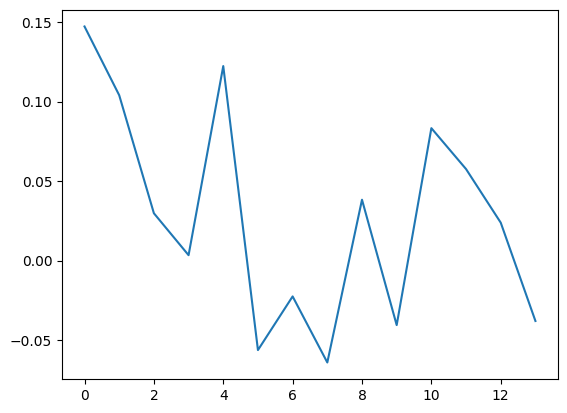

In [17]:
plt.plot(np.arange(len(all_data)), all_data - base_data)